# Race Heatmap

In [1]:
import fastf1

# Suppress info messages
fastf1.set_log_level('ERROR')

race = fastf1.get_session(2024, 'Bahrain', 'R')
race.load()

In [38]:
race.laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,LAPTIME_IN_S
0,0 days 01:01:37.510000,VER,1,0 days 00:01:37.284000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:41.266000,...,Red Bull Racing,0 days 00:59:59.911000,2024-03-02 15:03:42.342,12,1.0,False,,False,False,97.284
1,0 days 01:03:13.806000,VER,1,0 days 00:01:36.296000,2.0,1.0,NaT,NaT,0 days 00:00:30.916000,0 days 00:00:41.661000,...,Red Bull Racing,0 days 01:01:37.510000,2024-03-02 15:05:19.941,1,1.0,False,,False,True,96.296
2,0 days 01:04:50.559000,VER,1,0 days 00:01:36.753000,3.0,1.0,NaT,NaT,0 days 00:00:30.999000,0 days 00:00:41.966000,...,Red Bull Racing,0 days 01:03:13.806000,2024-03-02 15:06:56.237,1,1.0,False,,False,True,96.753
3,0 days 01:06:27.206000,VER,1,0 days 00:01:36.647000,4.0,1.0,NaT,NaT,0 days 00:00:30.931000,0 days 00:00:41.892000,...,Red Bull Racing,0 days 01:04:50.559000,2024-03-02 15:08:32.990,1,1.0,False,,False,True,96.647
4,0 days 01:08:04.379000,VER,1,0 days 00:01:37.173000,5.0,1.0,NaT,NaT,0 days 00:00:31.255000,0 days 00:00:42.056000,...,Red Bull Racing,0 days 01:06:27.206000,2024-03-02 15:10:09.637,1,1.0,False,,False,True,97.173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,0 days 02:25:37.856000,SAR,2,0 days 00:01:35.972000,51.0,4.0,NaT,NaT,0 days 00:00:30.781000,0 days 00:00:41.539000,...,Williams,0 days 02:24:01.884000,2024-03-02 16:27:44.315,1,20.0,False,,False,True,95.972
1125,0 days 02:27:13.843000,SAR,2,0 days 00:01:35.987000,52.0,4.0,NaT,NaT,0 days 00:00:30.775000,0 days 00:00:41.440000,...,Williams,0 days 02:25:37.856000,2024-03-02 16:29:20.287,1,20.0,False,,False,True,95.987
1126,0 days 02:28:49.931000,SAR,2,0 days 00:01:36.088000,53.0,4.0,NaT,NaT,0 days 00:00:30.798000,0 days 00:00:41.610000,...,Williams,0 days 02:27:13.843000,2024-03-02 16:30:56.274,1,20.0,False,,False,True,96.088
1127,0 days 02:30:29.545000,SAR,2,0 days 00:01:39.614000,54.0,4.0,NaT,NaT,0 days 00:00:32.179000,0 days 00:00:43.748000,...,Williams,0 days 02:28:49.931000,2024-03-02 16:32:32.362,1,20.0,False,,False,True,99.614


In [10]:
race.laps["LAPTIME_IN_S"] = race.laps["LapTime"].dt.total_seconds()

In [15]:
from plotnine import (
    ggplot,
    aes,
    geom_tile,
geom_text,
scale_fill_gradient, theme_bw
)

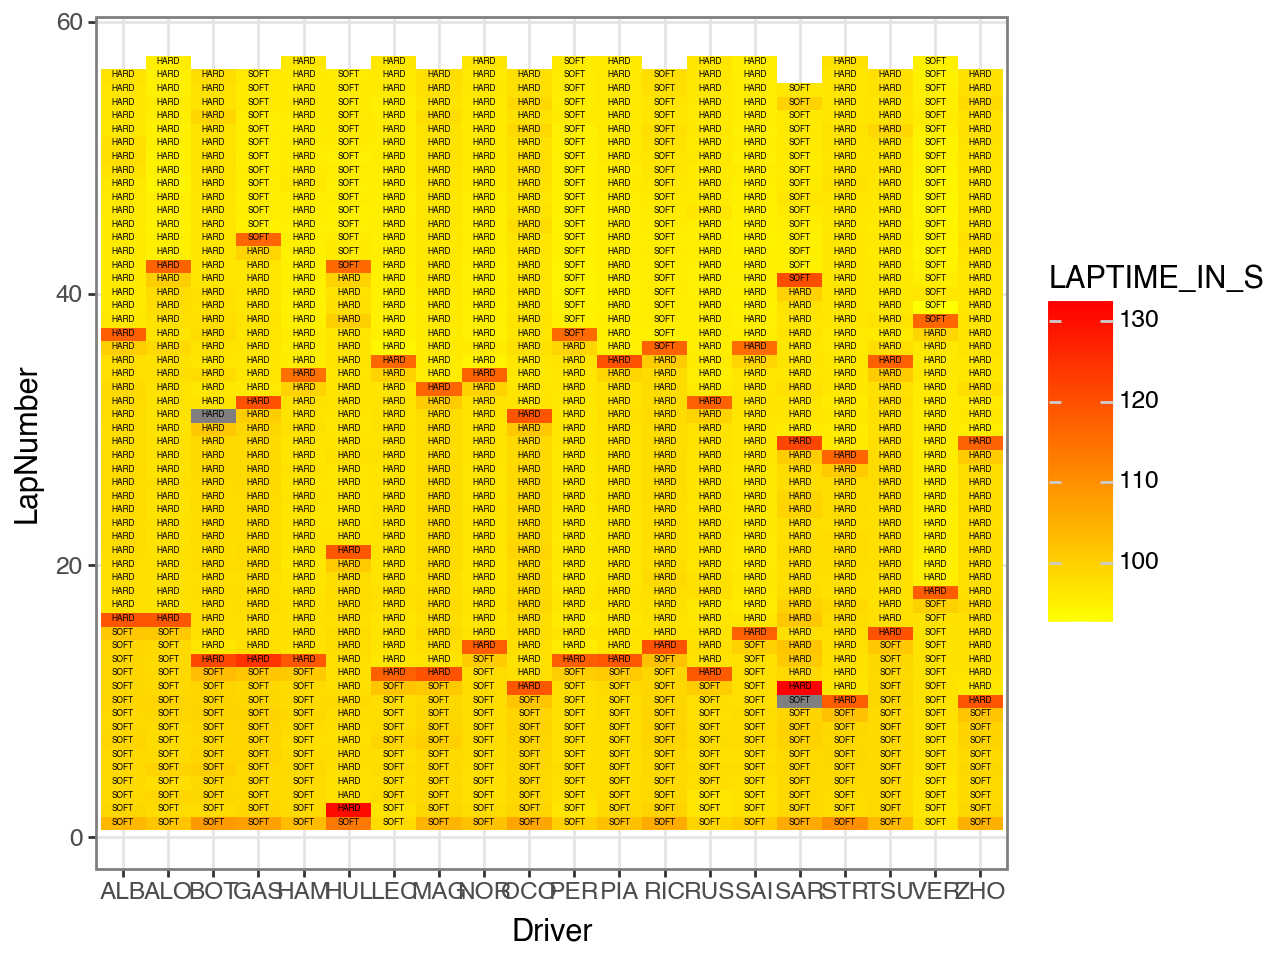

In [19]:
(
    ggplot(race.laps, aes("Driver", "LapNumber"))
    + geom_tile(aes(fill="LAPTIME_IN_S"))
    + geom_text(aes(label="Compound"), nudge_y=0.1, size=3)
    +scale_fill_gradient(low="yellow",high="red")+theme_bw()
)

In [27]:
# race lap penalty
# weight + tyre deg
import numpy as np
from scipy.stats import linregress

def calculate_slope(group):
    x = np.arange(len(group))  # Use the index as x (or customize for specific lap numbers)
    y = group['LAPTIME_IN_S'].values
    slope, intercept, _, _, _ = linregress(x, y)  # Calculate slope
    return slope

In [62]:
import pandas as pd
good_laps = pd.isnull(race.laps['PitOutTime']) & pd.isnull(race.laps['PitInTime']) & ~pd.isnull(race.laps['Sector1Time'])
slopes = race.laps[good_laps].groupby(['Driver', 'Stint']).apply( lambda group: pd.Series({'slope': calculate_slope(group),
                                                                                           'compound': group['Compound'].iloc[0],
                                                                                          'stint_length': len(group)}),
                                                                                          include_groups=False)
slopes.head(20)

slope compound  stint_length
Driver Stint                                 
ALB    1.0    0.032676     SOFT            13
       2.0    0.021489     HARD            19
       3.0    0.065202     HARD            19
ALO    1.0    0.030456     SOFT            13
       2.0    0.021712     HARD            24
       3.0    0.023464     HARD            15
BOT    1.0    0.062291     SOFT            10
       2.0    0.099206     HARD            16
       3.0    0.017388     HARD            25
GAS    1.0    0.025824     SOFT            10
       2.0    0.072100     HARD            17
       3.0    0.041776     HARD            10
       4.0    0.081140     SOFT            12
HAM    1.0   -0.006885     SOFT            10
       2.0    0.002756     HARD            19
       3.0    0.038158     HARD            23
HUL    2.0    0.030289     HARD            17
       3.0    0.059014     HARD            19
       4.0    0.039499     SOFT            14
LEC    1.0    0.083800     SOFT             9

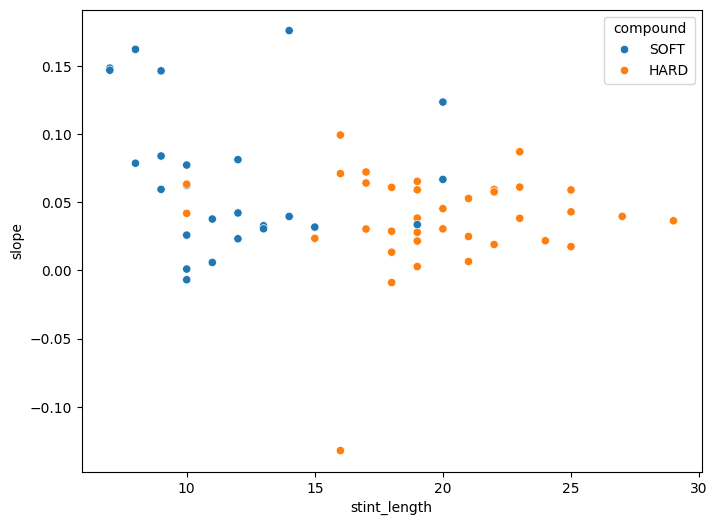

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.scatterplot(x='stint_length', y='slope', hue='compound', data=slopes)
plt.show()

In [30]:
stint_len =race.laps.groupby(['Driver', 'Stint']).size().reset_index(name='stint_length')
stint_len

,Driver,Stint,stint_length
0,ALB,1.0,15
1,ALB,2.0,21
2,ALB,3.0,20
3,ALO,1.0,15
4,ALO,2.0,26
...,...,...,...
58,VER,2.0,20
59,VER,3.0,20
60,ZHO,1.0,9
61,ZHO,2.0,19
